original cities list length 1095
The cities that didn't get bounced are: 981
             city  cloudiness country  humidity    lat   number   temp  \
0          Faanui          56      PF        97 -16.48  4034551  83.33   
1    Porto Walter          48      BR        82  -8.27  3662761  81.35   
2       Tamandare          20      BR        56  -8.28  3661980  93.20   
3         Madimba          40      CM       100   4.42  2221046  77.00   
4          Bukama          12      CD        81  -9.20   217834  73.25   
5            Lata          64      IN        83  30.78  1253628  48.91   
6          Atuona          88      PF       100  -9.80  4020109  80.45   
7         Merauke          48      ID       100  -8.49  2082539  78.74   
8       Jamestown           0      AU        85 -33.21  2069194  41.71   
9    Puerto Ayora          75      EC        74  -0.74  3652764  80.60   
10         Kamina          20      CD        85  -8.74   214614  69.61   
11        Matamba          56      

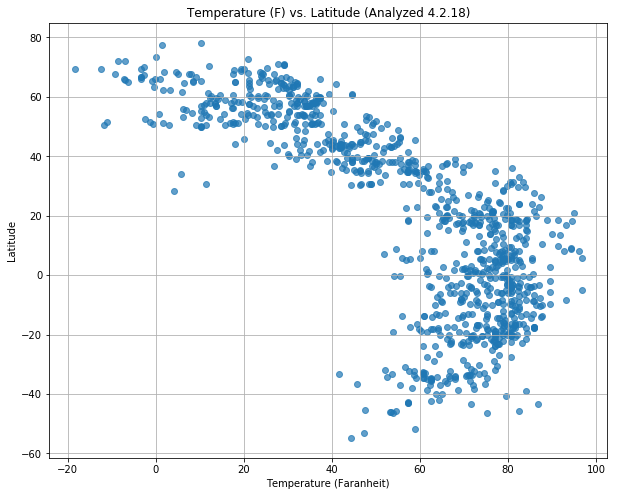

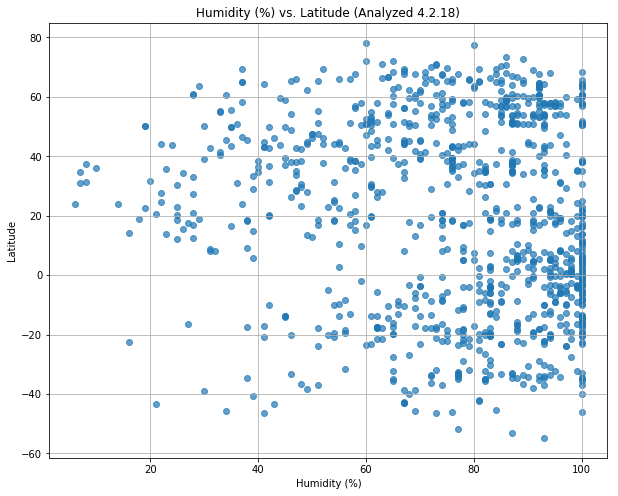

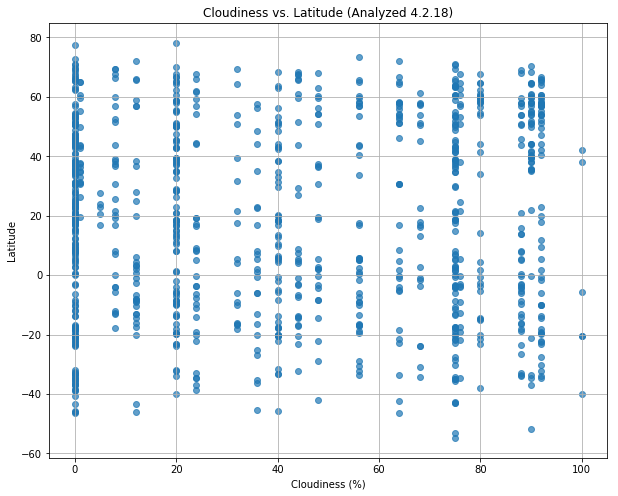

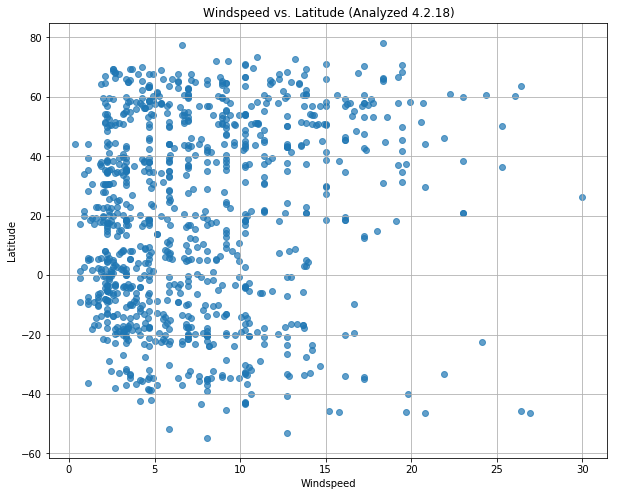

In [34]:
#observations are at the bottom of the notebook under graphs.

# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import openweathermapy.core as owm
#from config import api_key
api_key = 'cc2673f85c7bc99711220b176e68a8e6'
settings = {"units": "imperial", "appid": api_key}
current_weather_paris = owm.get_current("Paris", **settings)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


#Random list of cities    ############################
from citipy import citipy
import random

#print 
lat = []
for x in range(76): 
    lat.append(random.randint(-90,90))
lat 

long = []
for x in range(76): 
    long.append(random.randint(-180,180))
long

latlong = list(zip(lat,long))
#print(latlong)

cities=[]

for i in lat:
    for y in long:
        city = citipy.nearest_city(i,y)
        if city.city_name not in cities:
            cities.append(city.city_name)
#print(cities)
citylen = len(cities)
print(f'original cities list length {citylen}')

##########################################################
#cities = ["Paris", "London", "Oslo", "Beijing", 'New York']

# set up lists to hold reponse info
lat = []
temp = []
humidity = []
cloudiness = []
windspeed = []
clean_cities = [] #add cities that don't have a key error to list
country = []
number = [] #city id
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        clean_cities.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity']) 
        windspeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        number.append(response['id'])
    except KeyError:
        pass

city_count = len(clean_cities)    
print(f"The cities that didn't get bounced are: {city_count}")
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

# create a data frame from cities, lat, and temp
weather_dict = {
    "city": clean_cities,
    "country": country,
    "lat": lat,
    "temp": temp,
    "number": number,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "request URL": query_url
}

weather_data = pd.DataFrame(weather_dict)
weather_data["request url"] = weather_data["request URL"] + weather_data["city"]
weather_data.drop("request URL", axis=1, inplace = True)
print(weather_data.head(20))
weather_data.to_csv("weather.csv")

#PLOTS


# TEMP V LAT
plt.figure(figsize=(10,8))
plt.scatter(weather_data["temp"], weather_data["lat"], marker="o", alpha=0.7)
# Incorporate the other graph properties
plt.title("Temperature (F) vs. Latitude (Analyzed 4.2.18)")
plt.xlabel("Temperature (Faranheit)")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("TemperatureInWorldCities.png")
# Show plot
plt.show()



# HUMIDITY V LATITUDE
plt.figure(figsize=(10,8))
plt.scatter(weather_data["humidity"], weather_data["lat"], marker="o", alpha=0.7)
# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude (Analyzed 4.2.18)")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Humidity_v_Latitude.png")
# Show plot
plt.show()



# Cloudiness
plt.figure(figsize=(10,8))
plt.scatter(weather_data["cloudiness"], weather_data["lat"], marker="o", alpha=0.7)
# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude (Analyzed 4.2.18)")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Cloudiness_v_Latitude.png")
# Show plot
plt.show()



# Windspeed
plt.figure(figsize=(10,8))
plt.scatter(weather_data["windspeed"], weather_data["lat"], marker="o", alpha=0.7)
# Incorporate the other graph properties
plt.title("Windspeed vs. Latitude (Analyzed 4.2.18)")
plt.xlabel("Windspeed")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Windspeed_v_Latitude.png")
# Show plot
plt.show()



'''
Observations:
1. As the latitude approached 0 temperatures do rise as we would expect. 
2. Cloudiness has almost no correlation with latitude and windspeed is alost generally low across the board.
3. There does appear to be a higher concentration of humidity towards the equator. 
   But it looks generally dispersed across latitudes. 
   Overall I would say aside from temperature there is no strong latitudinal 
   variation in the weather related phenoemena we covered. 
'''